In [1]:
%pip install graphviz

You should consider upgrading via the '/Users/alex/PycharmProjects/ml/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pydotplus

You should consider upgrading via the '/Users/alex/PycharmProjects/ml/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Предварительный анализ 
### Загрузим необходимые библиотеки 

In [3]:
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.svm import NuSVR
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
df = pd.read_csv('country_wise_latest.csv')

In [5]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


### Изучим полученные данные

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [7]:
df.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

## С использованием метода train_test_split разделим выборку на обучающую и тестовую.
### Построим модель бинарной классификации пользователей, где целевой признак - факт оттока пользователя в следующем месяце.

In [8]:
#Кодирование категориальных признаков

df["WHO Region"] = df["WHO Region"].astype('category')
df["Country/Region"] = df["Country/Region"].astype('category')

#Назначить закодированную переменную новосу столбцу с помощью метода доступа
df["WHO Region_cat"] = df["WHO Region"].cat.codes
df["Country/Regioncat"] = df["Country/Region"].cat.codes

df = df.drop(['WHO Region', 'Country/Region', 'Deaths / 100 Recovered'], axis=1)
df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change,1 week % increase,WHO Region_cat,Country/Regioncat
0,36263,1269,25198,9796,106,10,18,3.50,69.49,35526,737,2.07,2,0
1,4880,144,2745,1991,117,6,63,2.95,56.25,4171,709,17.00,3,1
2,27973,1163,18837,7973,616,8,749,4.16,67.34,23691,4282,18.07,0,2
3,907,52,803,52,10,0,0,5.73,88.53,884,23,2.60,3,3
4,950,41,242,667,18,1,0,4.32,25.47,749,201,26.84,0,4


In [9]:
X = df.drop(['Deaths'], axis = 1)
y = df['Deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

### Линейная регрессия

- Линейная регрессия предсказывает непрерывную величину, например, курс валюты, стоимость недвижимости и прочее.

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
pd.DataFrame(model.coef_, X.columns, columns = ['coefficient'])

,coefficient
Confirmed,6.666667e-01
Recovered,-1.000000e+00
Active,-1.000000e+00
New cases,-7.481862e-15
New deaths,1.750130e-13
New recovered,1.383789e-14
Deaths / 100 Cases,-1.830069e-13
Recovered / 100 Cases,-3.814062e-13
Confirmed last week,3.333333e-01
1 week change,3.333333e-01


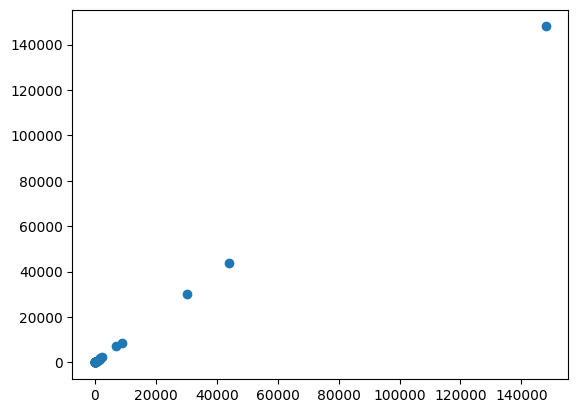

In [12]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)

(array([18., 17.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-5.27506927e-11, -9.64064384e-12,  3.34694050e-11,  7.65794539e-11,
         1.19689503e-10,  1.62799552e-10,  2.05909600e-10,  2.49019649e-10,
         2.92129698e-10,  3.35239747e-10,  3.78349796e-10]),
 <BarContainer object of 10 artists>)

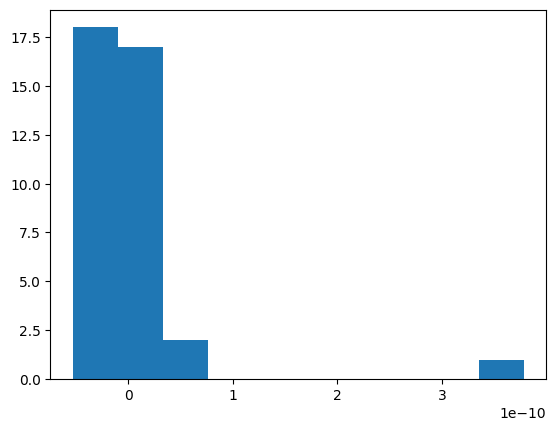

In [13]:
plt.hist(y_test - predictions)

## SVM

In [14]:
# SVM
scaler = StandardScaler().fit(X_train)
x_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
x_train_scaled.describe()

,Confirmed,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change,1 week % increase,WHO Region_cat,Country/Regioncat
count,1.490000e+02,149.000000,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02
mean,5.960929e-18,0.000000,8.941393e-18,1.788279e-17,1.788279e-17,1.192186e-17,1.788279e-16,-3.993822e-16,2.980464e-18,7.451161e-18,-8.941393e-17,-1.192186e-17,9.835533e-17
std,1.003373e+00,1.003373,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00
min,-2.870374e-01,-0.264943,-3.120163e-01,-2.188605e-01,-2.374415e-01,-1.975470e-01,-8.126736e-01,-2.548762e+00,-2.986463e-01,-1.986859e-01,-1.103606e+00,-1.328381e+00,-1.691928e+00
25%,-2.823292e-01,-0.261324,-3.097237e-01,-2.172139e-01,-2.374415e-01,-1.975470e-01,-5.805374e-01,-6.755093e-01,-2.936804e-01,-1.959368e-01,-6.524483e-01,-6.919539e-01,-8.524555e-01
50%,-2.572049e-01,-0.243876,-2.793655e-01,-1.986307e-01,-2.260547e-01,-1.880626e-01,-2.365285e-01,2.304654e-01,-2.662389e-01,-1.777609e-01,-2.987627e-01,-5.552717e-02,-4.948161e-02
75%,-1.041213e-01,-0.136899,-1.671650e-01,-1.141830e-01,-1.691207e-01,-1.311566e-01,1.913851e-01,8.427259e-01,-1.093270e-01,-9.990603e-02,3.271493e-01,5.808996e-01,8.812381e-01
max,9.575167e+00,9.908525,7.506260e+00,1.023877e+01,7.015949e+00,8.448062e+00,7.175047e+00,1.331215e+00,9.636183e+00,8.469760e+00,7.486497e+00,1.853753e+00,1.702461e+00


In [15]:
nusvr_05 = NuSVR(nu=0.7, gamma = 'scale')
nusvr_05.fit(X_train, y_train)

NuSVR(nu=0.7)

## Дерево решений

In [16]:
dt_none = DecisionTreeRegressor(max_depth=3)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5416666666666666, 0.875, 'x[2] <= 227762.0\nsquared_error = 88999619.837\nsamples = 149\nvalue = 2725.04'),
 Text(0.3333333333333333, 0.625, 'x[8] <= 232598.0\nsquared_error = 21102372.903\nsamples = 146\nvalue = 1638.089'),
 Text(0.16666666666666666, 0.375, 'x[8] <= 60879.0\nsquared_error = 3240448.757\nsamples = 138\nvalue = 798.29'),
 Text(0.08333333333333333, 0.125, 'squared_error = 452722.76\nsamples = 120\nvalue = 287.583'),
 Text(0.25, 0.125, 'squared_error = 8494429.889\nsamples = 18\nvalue = 4203.0'),
 Text(0.5, 0.375, 'x[9] <= 7889.0\nsquared_error = 107195059.234\nsamples = 8\nvalue = 16124.625'),
 Text(0.4166666666666667, 0.125, 'squared_error = 11155600.0\nsamples = 2\nvalue = 31772.0'),
 Text(0.5833333333333334, 0.125, 'squared_error = 30390281.472\nsamples = 6\nvalue = 10908.833'),
 Text(0.75, 0.625, 'x[11] <= 2.0\nsquared_error = 537605030.222\nsamples = 3\nvalue = 55623.333'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 87618.0')

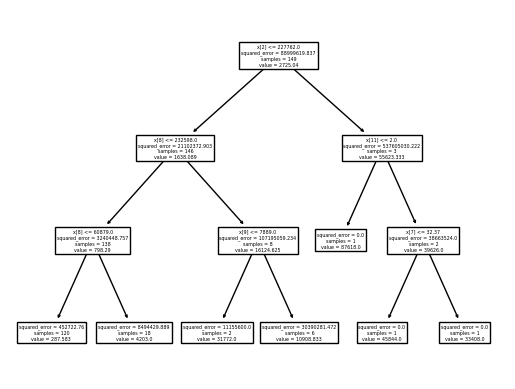

In [17]:
tree.plot_tree(dt_none)

In [18]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [19]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

In [20]:
test_model(dt_none)

mean_absolute_error: 3709.291666666666
median_absolute_error: 278.0833333333333
r2_score: 0.7651729858312535


In [29]:
def full_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y, model.predict(X)))
    print("median_absolute_error:",
          median_absolute_error(y, model.predict(X)))
    print("r2_score:",
          r2_score(y, model.predict(X)))

In [30]:
full_model(nusvr_05)

mean_absolute_error: 1556.1550802139038
median_absolute_error: 0.0
r2_score: 0.3232840585070238


In [23]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(dt_none, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [24]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

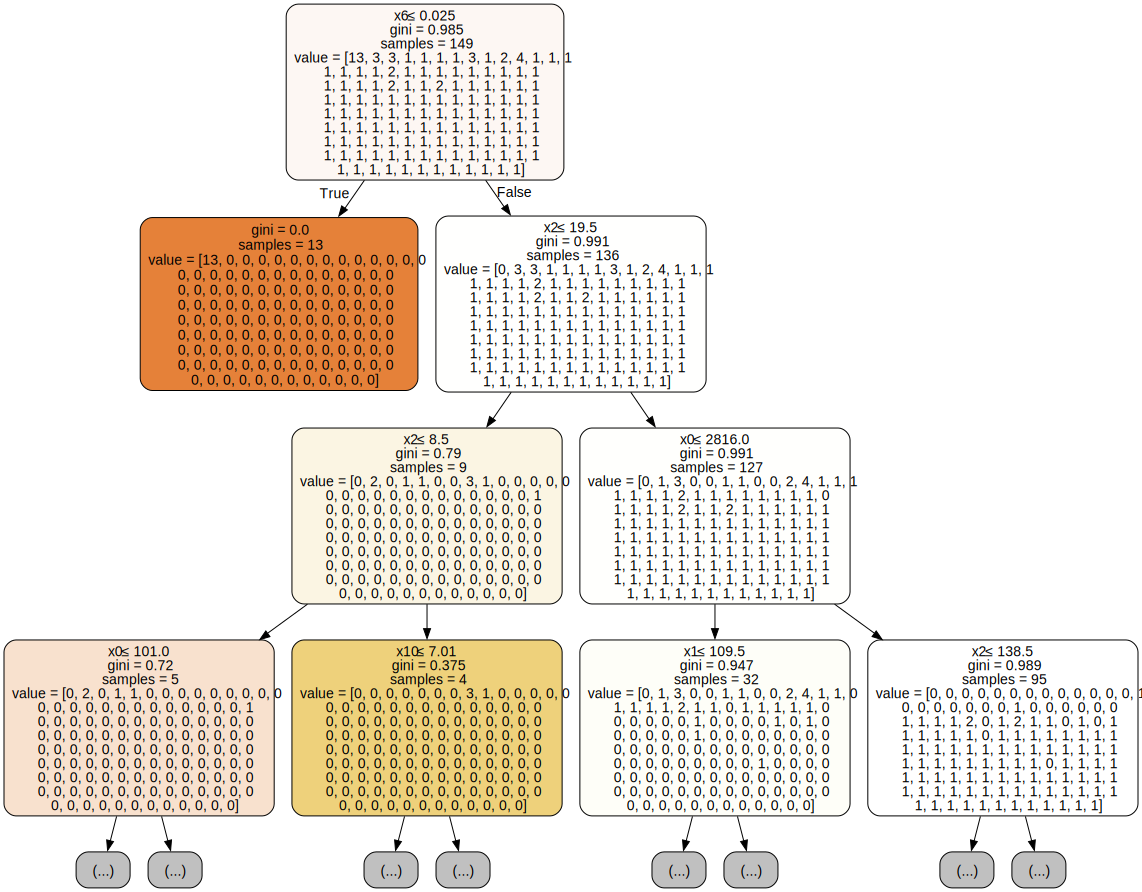

In [25]:
dot_data = export_graphviz(clf, out_file=None,  
                           filled=True, rounded=True, special_characters=True,max_depth=3)  
graph = graphviz.Source(dot_data)  
graph

## Важность признаков

In [26]:
list(zip(X_train.columns.values, clf.feature_importances_))

[('Confirmed', 0.1167356229848409),
 ('Recovered', 0.05130803693972785),
 ('Active', 0.09864902386422757),
 ('New cases', 0.0852090767682313),
 ('New deaths', 0.02045017842437551),
 ('New recovered', 0.027266904565834013),
 ('Deaths / 100 Cases', 0.22106492427696667),
 ('Recovered / 100 Cases', 0.06135053527312653),
 ('Confirmed last week', 0.06996670775627445),
 ('1 week change', 0.04090035684875102),
 ('1 week % increase', 0.06703114039100862),
 ('WHO Region_cat', 0.047717082990209526),
 ('Country/Regioncat', 0.09235040891642592)]

In [27]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

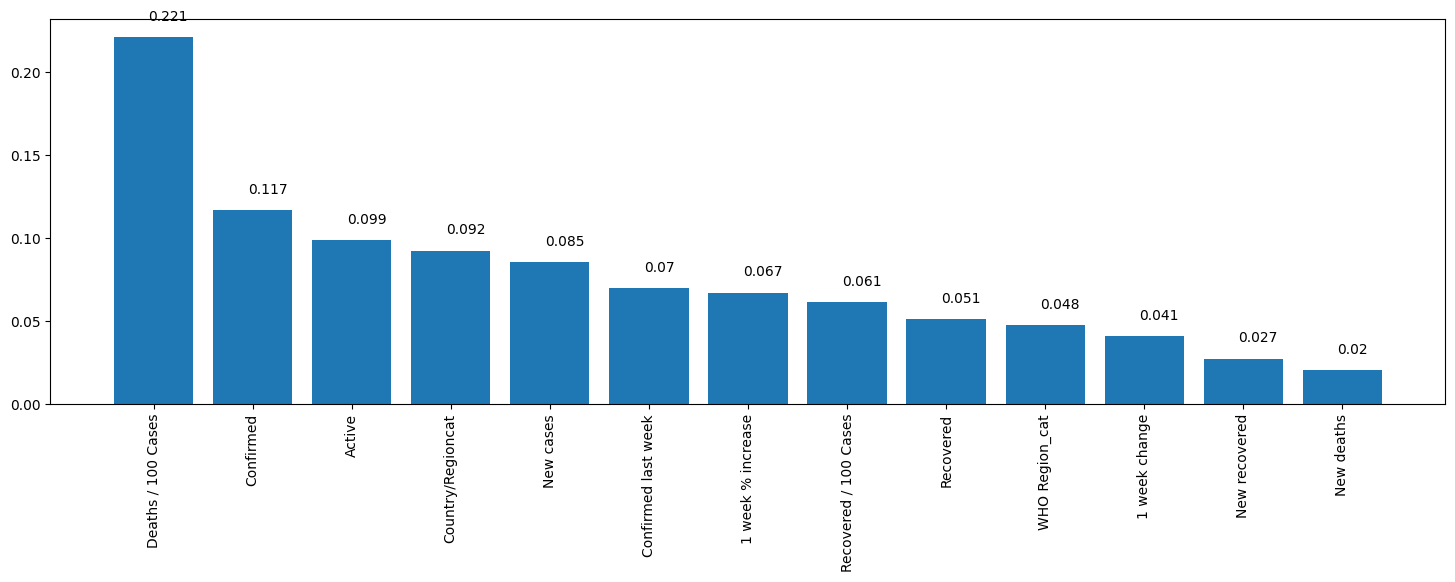

In [28]:
dt_fl, dt_fd = draw_feature_importances(clf, X_train)